# **PCOS Prediction System**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [4]:
PCOS_w_inf = pd.read_csv("PCOS_infertility.csv")
PCOS_wo_inf = pd.read_excel("PCOS_data_without_infertility.xlsx",sheet_name="Full_new")

## Pre-Processing

In [6]:
df = pd.merge(PCOS_wo_inf,PCOS_w_inf,on='Patient File No.', suffixes=('','_y'),how='left')

In [7]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_y,PCOS (Y/N)_y,I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y,AMH(ng/mL)_y
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,3,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,5,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,15,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,2,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,4,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop(['Unnamed: 44','Sl. No_y','PCOS (Y/N)_y','  I   beta-HCG(mIU/mL)_y',
              'II    beta-HCG(mIU/mL)_y','AMH(ng/mL)_y'],axis=1)

In [9]:
df.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [10]:
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
df.fillna(0, inplace=True)

## Data Visualization

Starting with a more general assessment of the age distribution using a countplot:

<Axes: xlabel=' Age (yrs)', ylabel='count'>

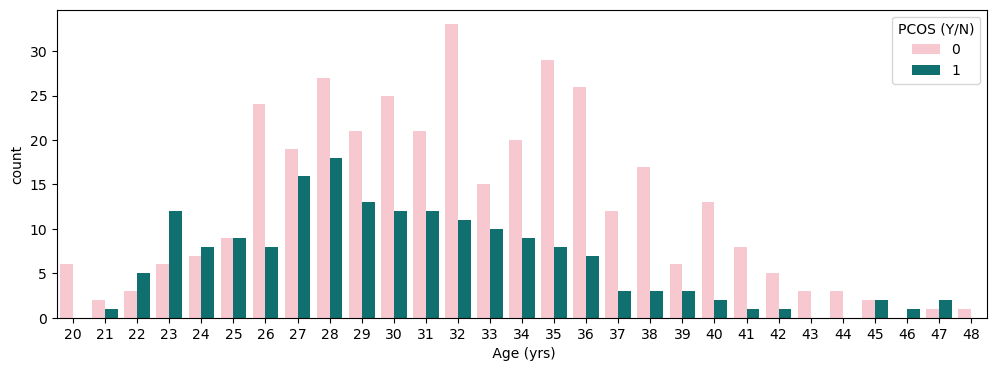

In [13]:
plt.rcParams['figure.figsize']=(12,4)
sns.countplot(df,x=' Age (yrs)',hue='PCOS (Y/N)',palette=['pink','teal'])

The visualization above provides more information about the age range most often tested (or most prevalent in the dataset) than it does about a relationship between age and a positive PCOS diagnosis. 

In order to identify attributes with high correlation, we can plot a heatmap to display the correlation matrix.

<Axes: >

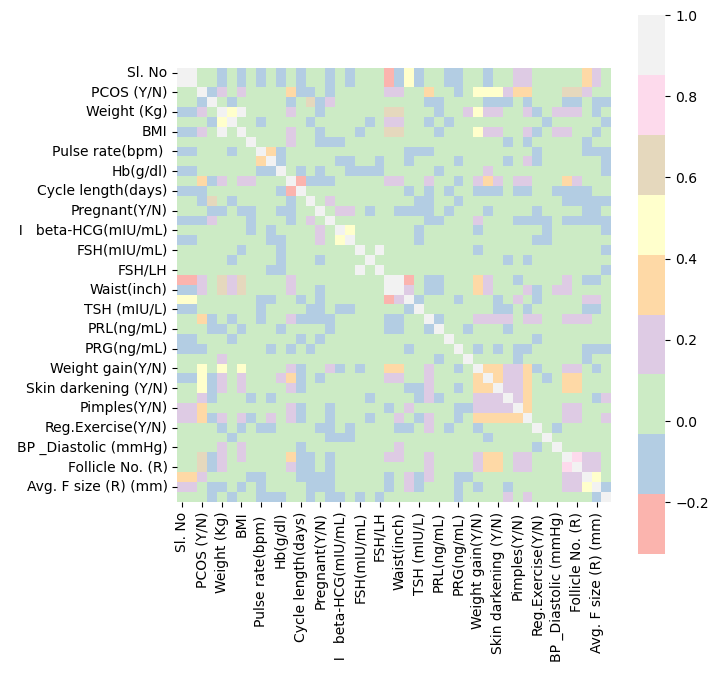

In [16]:
plt.rcParams['figure.figsize']=(7,7)
sns.heatmap(df.corr(),cmap='Pastel1', square='True')

The visual above is useful, but difficult to follow. Using our correlation matrix, let's see what attributes have the highest relation to PCOS and go from there.

In [18]:
df.corr()['PCOS (Y/N)'].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.378720
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264755
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)    

In [19]:
corr_matrix = df.corr()
pos = corr_matrix.nlargest(7, "PCOS (Y/N)")["PCOS (Y/N)"].index
neg = corr_matrix.nsmallest(2, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = pos.append(neg)

<Axes: >

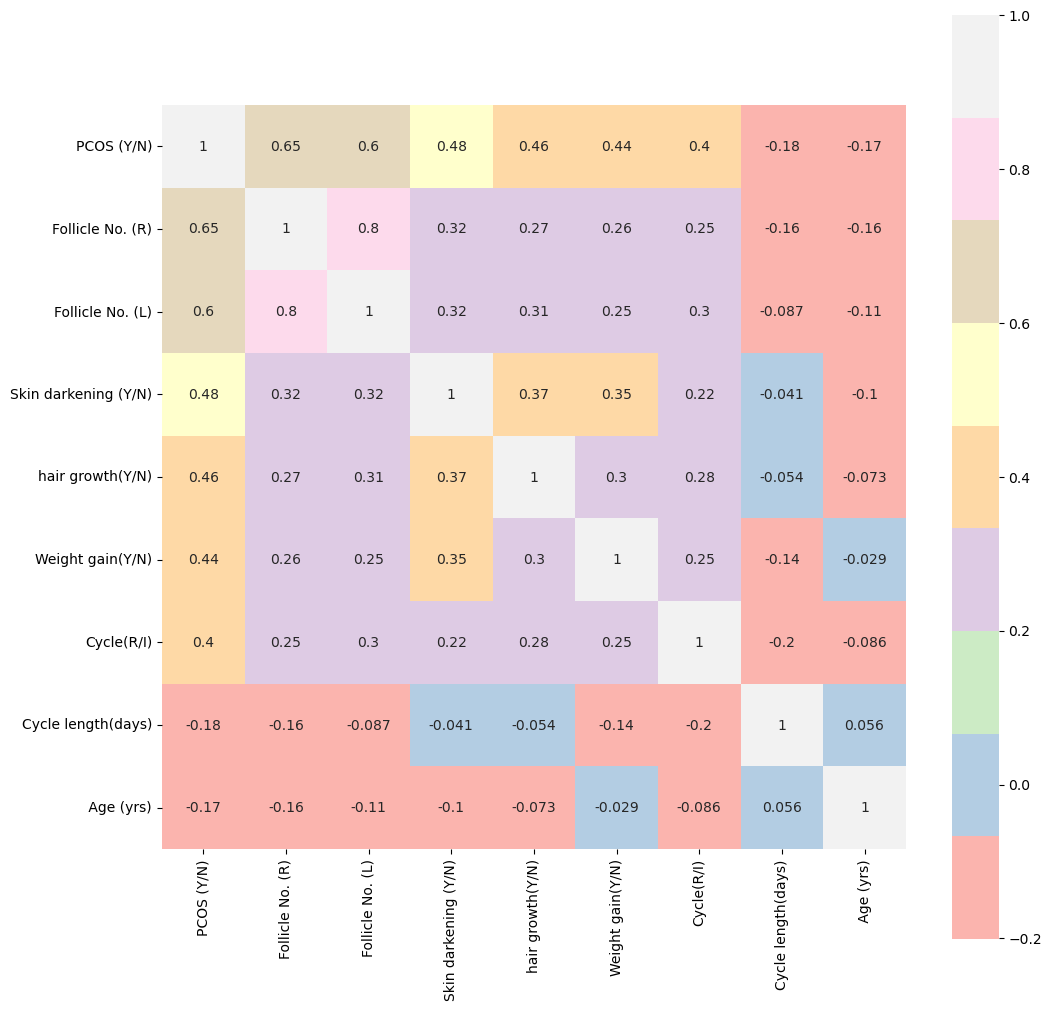

In [20]:
plt.rcParams['figure.figsize']=(12,12)
c = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(c, cmap="Pastel1", square=True, annot=True, yticklabels=cols.values, xticklabels=cols.values)
hm

Here we can see that the highest correlation is between Follicle No. (R) and Follicle No. (L). 

C:\Users\tahiy\AppData\Local\Temp\ipykernel_25104\77873686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], alpha=0.5, palette=['pink','teal'])
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


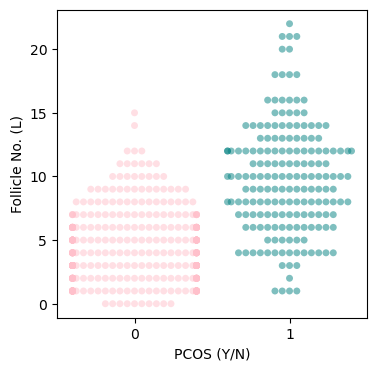

C:\Users\tahiy\AppData\Local\Temp\ipykernel_25104\77873686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], alpha=0.5, palette=['pink','teal'])
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)

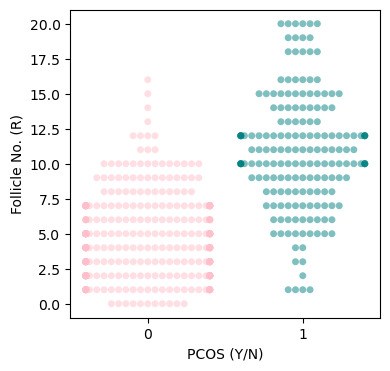

C:\Users\tahiy\AppData\Local\Temp\ipykernel_25104\77873686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], alpha=0.5, palette=['pink','teal'])
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


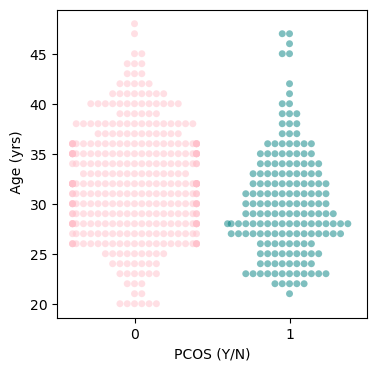

C:\Users\tahiy\AppData\Local\Temp\ipykernel_25104\77873686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], alpha=0.5, palette=['pink','teal'])
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


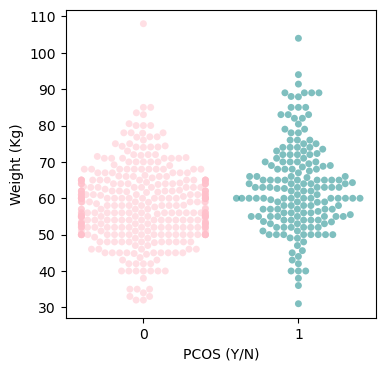

C:\Users\tahiy\AppData\Local\Temp\ipykernel_25104\77873686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], alpha=0.5, palette=['pink','teal'])
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


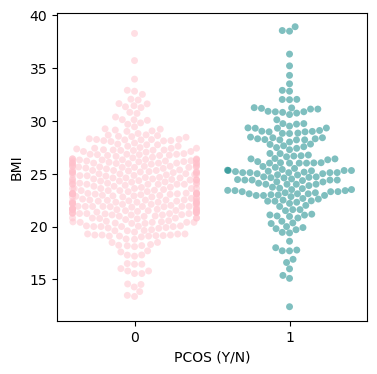

C:\Users\tahiy\AppData\Local\Temp\ipykernel_25104\77873686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], alpha=0.5, palette=['pink','teal'])
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)

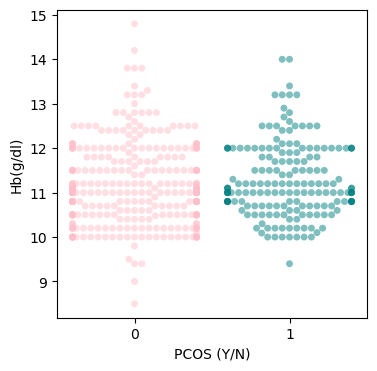

C:\Users\tahiy\AppData\Local\Temp\ipykernel_25104\77873686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], alpha=0.5, palette=['pink','teal'])
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)

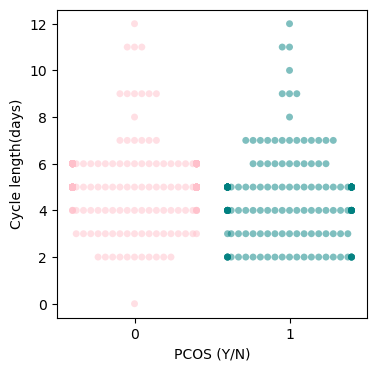

C:\Users\tahiy\AppData\Local\Temp\ipykernel_25104\77873686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], alpha=0.5, palette=['pink','teal'])
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tahiy\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)

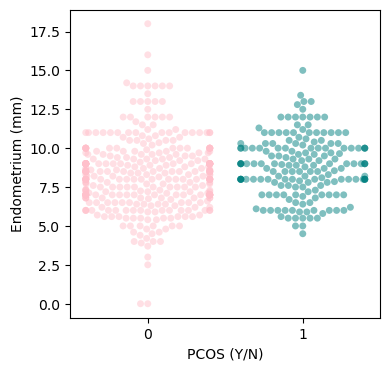

In [22]:
plt.rcParams['figure.figsize'] = (4,4)
features = ["Follicle No. (L)","Follicle No. (R)"," Age (yrs)","Weight (Kg)", 
            "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], alpha=0.5, palette=['pink','teal'])
    plt.show()

## Modelling and Evaluation

**Experiment 1: Model built using LogisticRegression()**

In [25]:
X = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
exp1 = LogisticRegression(solver="liblinear")
exp1.fit(X_train,y_train)
y_pred = exp1.predict(X_test)

In [26]:
exp1_accuracy = accuracy_score(y_test, y_pred)
exp1_f1 = f1_score(y_test, y_pred)
exp1_precision = precision_score(y_test, y_pred)
exp1_cm = confusion_matrix(y_test, y_pred)
exp1_accuracy

0.8899082568807339

In [27]:
exp1_f1

0.8536585365853658

In [28]:
exp1_precision

0.7777777777777778

In [29]:
print(classification_report(y_test, exp1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        72
           1       0.78      0.95      0.85        37

    accuracy                           0.89       109
   macro avg       0.87      0.90      0.88       109
weighted avg       0.90      0.89      0.89       109



<Axes: >

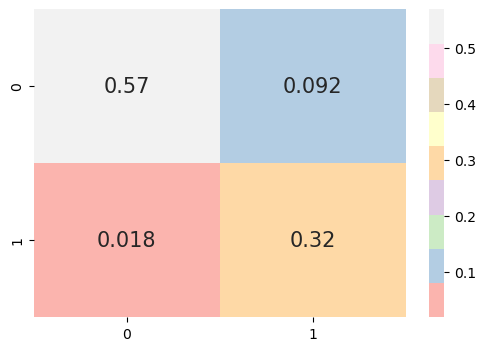

In [30]:
plt.rcParams['figure.figsize'] = (6,4)
sns.heatmap(exp1_cm/np.sum(exp1_cm), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

**Experiment 2: Model built using RandomForestClassifier()**

In [33]:
exp2 = RandomForestClassifier()
exp2.fit(X_train, y_train)
y_pred = exp2.predict(X_test)
exp2_accuracy = accuracy_score(y_test, y_pred)
exp2_f1 = f1_score(y_test, y_pred)
exp2_precision = precision_score(y_test, y_pred)
exp2_cm = confusion_matrix(y_test, y_pred)

In [34]:
print(classification_report(y_test, exp2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        72
           1       0.89      0.84      0.86        37

    accuracy                           0.91       109
   macro avg       0.90      0.89      0.90       109
weighted avg       0.91      0.91      0.91       109



<Axes: >

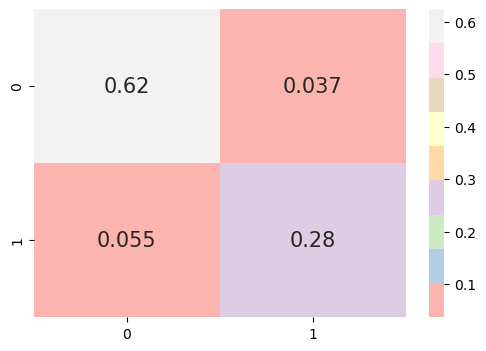

In [35]:
sns.heatmap(exp2_cm/np.sum(exp2_cm), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

**Experiment 3: Model built using SGDClassifier()**

In [43]:
exp3 = SGDClassifier()
exp3.fit(X_train, y_train)
y_pred = exp3.predict(X_test)
exp3_accuracy = accuracy_score(y_test, y_pred)
exp3_f1 = f1_score(y_test, y_pred)
exp3_precision = precision_score(y_test, y_pred)
exp3_cm = confusion_matrix(y_test, y_pred)

In [44]:
print(classification_report(y_test, exp3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        72
           1       0.88      0.95      0.91        37

    accuracy                           0.94       109
   macro avg       0.92      0.94      0.93       109
weighted avg       0.94      0.94      0.94       109



<Axes: >

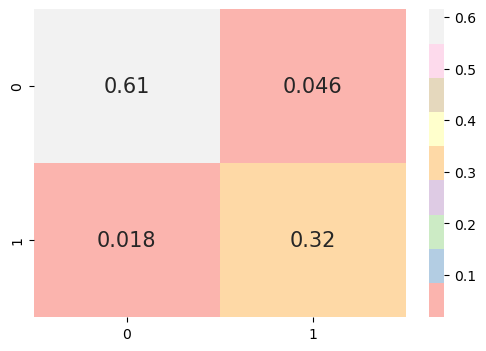

In [46]:
sns.heatmap(exp3_cm/np.sum(exp3_cm), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')